# Cutoff for the solar atmosphere using the VALIIIc Model

##Background - the problem


The cutoff frequency for the slow magnetoacoustic wave is derived in *Roberts (2006)* from equation (3.11) which is given below:

$$\frac{\partial^2 Q}{\partial t^2} - c_t^2(z) \frac{\partial^2 Q}{\partial z^2} + \Omega^2(z)Q = 0 \qquad\text{(1)}$$

which by fourier analysing in time gives the following equation:

$$\frac{d^2 Q(z)}{d t^2} + \left( \frac{\omega^2 - \Omega^2(z)}{c_t^2(z)} \right)Q(z) = 0 \qquad\text{(2)}$$
	

Compute the atmospheric cut-off frequenccy (From Roberts 2004)

$$ \omega_{c}=\frac{\gamma g}{4\pi c_{s}}\sqrt{1+2\frac{d}{dz}\frac{P}{\rho g}}$$

The atmospheric scale parameter 

Read VAL IIc data from csv file

column 1 height [m]
Column 2 Temperature [K]
Column 3 Density [kg/m^3]
Column 4 Pressure [Pa]


(2048L, 4L)
[ 6.20960377  6.20920411  6.20880509 ...,  3.76641285  3.76641285
  3.76641285]


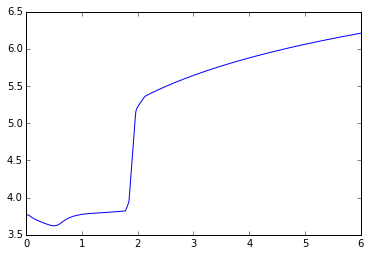

In [26]:
import numpy as numpy
import matplotlib.pyplot as plt
import math



%matplotlib inline 
data=numpy.loadtxt(fname='..\\data\\atmos.csv', delimiter=',')
#print data
print data.shape
#print data[1:10,2]
height=data[0:2048,0]
ltemp=numpy.log10(data[0:2048,1]) #notation to avoid http://stackoverflow.com/questions/21687581/typeerror-only-length-1-arrays-can-be-converted-to-python-scalars-while-trying

print ltemp
plt.plot(height/1.0e6,ltemp)

## Function to compute the speed of sound

8192
2048
2048


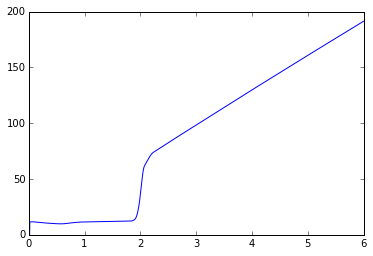

In [32]:
from math import exp, sqrt, pi

class vars:
  
    mu=0.6e0
    R=8.31e3
    fgamma=1.66666667e0
    ggg=-274.0e0
    mu=4*pi/1.0e7
    

def cs(var, p, rho):
    vcs=sqrt(vars.fgamma*p/rho)
    return vcs

ptemp=numpy.float64(data[1:2048,3])
rhotemp=numpy.float64(data[1:2048,2])
#ptemp=numpy.float64(301.2741)

asize=data.size
print asize
acs = numpy.zeros(asize/4)
for i in range(0,(asize/4)-3):
    #acs[i]=cs(vars,ptemp[i],rhotemp[i]);
    count=1
    ptot=ptemp[i]
    rhottot=rhotemp[i]
    for j in range(i+1,i+10):        
        if j<=(asize/4)-4:
            ptot=ptot+ptemp[j]
            rhottot=rhottot+rhotemp[j]
            count=count+1
    ptemp[i]=ptot/count
    rhotemp[i]=rhottot/count
    #print i,count,ptemp[i],rhotemp[i]
    acs[i]=cs(vars,ptemp[i],rhotemp[i]);
    
print acs.size
print height.size
plt.plot(height/1.0e6,acs/1000)
#ptemp=numpy.float64(data[1:2048,3])

##Functions to compute sound speed analog and gradient from best fits


$$ \frac{d}{dz}\frac{P}{\rho g}$$

In [33]:
from math import exp, sqrt, pi

def p_over_rhog(vars, h):
    poverrhog=0
    
    #region 1
    if h>=2.0419e6 and h<=6e6:
        poverrhog=177.4+1.349e-5*math.pow(h,1.886)
    #region2
    elif h>=1.802e6 and h<=2.039e6:
        p1=-4.415e-34
        p2=6.797e-27
        p3=-4.576e-20
        p4=1.76e-13
        p5=-4.228e-7
        p6=0.65
        p7=-6.243e5
        p8=3.426e11
        p9=-8.22e16
        poverrhog=p1*math.pow(h,8)+p2*math.pow(h,7)+p3*math.pow(h,6)+p4*math.pow(h,5)+p5*math.pow(h,4)+p6*math.pow(h,3)+p7*math.pow(h,2)+p8*h+p9            
    #region3
    elif h>=8.7e3 and h<1.7991e6:
        p1=1.37e-42
        p2=-9.683e-36
        p3=2.732e-29
        p4=-3.894e-23
        p5=2.904e-17
        p6=-1.067e-11
        p7=1.973e-6
        p8=-0.4078
        p9=3.051e5
        poverrhog=p1*math.pow(h,8)+p2*math.pow(h,7)+p3*math.pow(h,6)+p4*math.pow(h,5)+p5*math.pow(h,4)+p6*math.pow(h,3)+p7*math.pow(h,2)+p8*h+p9            
                
    return math.fabs(poverrhog)


#compute derivative
def dp_over_rhog(vars, h):
    dpoverrhog=0
    
     #region 1
    if h>=2.0419e6 and h<=6e6:
        dpoverrhog=2.544214e-5*math.pow(h,0.886)
    #region2
    elif h>=1.802e6 and h<=2.039e6:
        p1=-4.415e-34
        p2=6.797e-27
        p3=-4.576e-20
        p4=1.76e-13
        p5=-4.228e-7
        p6=0.65
        p7=-6.243e5
        p8=3.426e11
        p9=-8.22e16
        #dpoverrhog=8*p1*math.pow(h,7)+7*p2*math.pow(h,6)+6*p3*math.pow(h,5)+5*p4*math.pow(h,4)+4*p5*math.pow(h,3)+3*p6*math.pow(h,2)+2*p7*h+p8                
        dpoverrhog=2.544214e-5*math.pow(h,0.886)
    #region3
    elif h>=8.7e3 and h<1.7991e6:
        p1=1.37e-42
        p2=-9.683e-36
        p3=2.732e-29
        p4=-3.894e-23
        p5=2.904e-17
        p6=-1.067e-11
        p7=1.973e-6
        p8=-0.4078
        p9=3.051e5
        dpoverrhog=8*p1*math.pow(h,7)+7*p2*math.pow(h,6)+6*p3*math.pow(h,5)+5*p4*math.pow(h,4)+4*p5*math.pow(h,3)+3*p6*math.pow(h,2)+2*p7*h+p8                
    return math.fabs(dpoverrhog)

## Function to compute the atmospheric scale parameter

8192
5259.23831035
5256.7900436
5254.34241849
5251.89543426
5249.44909016
5247.00343283
5244.55836669
5242.11393843
5239.67014728
5237.2269925
5234.7844733
5232.34263609
5229.90138571
5227.46076859
5225.02078397
5222.58138405
5220.14252116
5217.70395998
5215.26555978
5212.82708652
5210.38826005
5207.94875433
5205.50824434
5203.06621922
5200.6222631
5198.17610141
5195.72760029
5193.27681264
5190.82379121
5188.36886756
5185.91246516
5183.45509895
5180.99737503
5178.54003659
5176.08377812
5173.62906051
5171.17611201
5168.72492918
5166.27532396
5163.82673994
5161.37853032
5158.93000436
5156.48042748
5154.02902154
5151.57501091
5149.11789787
5146.65750735
5144.19398564
5141.72779906
5139.25977839
5136.79093453
5134.32227509
5131.85480432
5129.38952322
5126.92742944
5124.46933529
5122.01568655
5119.56656399
5117.1216848
5114.68040414
5112.24176188
5109.80475571
5107.36834131
5104.93143251
5102.49290148
5100.05162407
5097.60675054
5095.15770442
5092.70418148
5090.24614859
5087.78384263
5085.3

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars


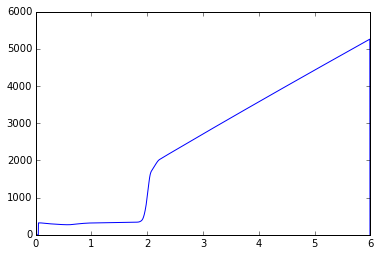

In [47]:
from math import exp, sqrt, pi





def lambda0(vars, P,rho):
    vlam0=-P/(rho*vars.ggg)
    return vlam0

def lagrange_interp(xval,f,x,i): 
    t1=(xval-x[i])*(xval-x[i+1])/((x[i-1]-x[i])*(x[i-1]-x[i+1]))
    t2=(xval-x[i-1])*(xval-x[i+1])/((x[i]-x[i-1])*(x[i]-x[i+1]))
    t3=(xval-x[i-1])*(xval-x[i])/((x[i+1]-x[i-1])*(x[i+1]-x[i]))
    y=t1*f[i-1]+t2*f[i]+t3*f[i+1]
    return y

def diff5p(y,i,h):
    diff=(y[i-2]-8*y[i-1]+8*y[i+1]-y[i+2])/(12*h)
    return diff

def diff3p(y,i,h):
    diff=(y[i+1]-y[i-1])/(2*h)    
    return diff

#compute lambda0
alam0 = numpy.zeros(asize/4)
alami0 = numpy.zeros(asize/4)
print asize
for i in range(1,(asize/4)-1):
    alam0[i]=lambda0(vars,ptemp[i],rhotemp[i])

dh=height[0]-height[1]    
for i in range(1,(asize/4)-2):
    xval=height[0]-i*dh
    alami0[i]=lagrange_interp(xval,alam0,height,i)    
    
    
#print alam0  
#compute cutoff
atc0 = numpy.zeros(asize/4)
lamdash0 = numpy.zeros(asize/4)
for i in range(2,(asize/4)-4):
    h=height[i]-height[i+1]
    #lamdash0[i]=diff3p(alam0,i,h)
    #lamdash0[i]=ptemp[i]/rhotemp[i]
    lamdash0[i]=diff5p(alami0,i,h)
    #if lamdash0[i]<-200:
    #    lamdash0[i]=-200
    count=1
    lamtot=0
    for j in range(i,i+4):
        if j<=(asize/4)-4:
            lamtot=lamtot+lamdash0[j]
            count=count+1
    lamtot=lamtot/count
    #lamdash0[i]=lamtot   

for i in range(2,(asize/4)-15):
    h=height[i]-height[i+1]
    #lamdash0[i]=diff3p(alam0,i,h)
    #lamdash0[i]=ptemp[i]/rhotemp[i]
    #lamdash0[i]=diff5p(alami0,i,h)
    #if lamdash0[i]<-200:
    #    lamdash0[i]=-200
    #print h,alam0[i],lamdash0[i]
    #print h,ptemp[i],rhotemp[i],lamdash0[i]
    #atc0[i]=1.0/((vars.fgamma*vars.ggg/(4*pi*acs[i]))*math.sqrt(1+2*lamdash0[i]))
    #atc0[i]=-1.0/((vars.fgamma*vars.ggg/(4*pi*acs[i])))*math.sqrt(1+2*dp_over_rhog(vars, height[i]))
    #atc0[i]=math.sqrt(-1.0/((vars.fgamma*vars.ggg/(2*acs[i]*acs[i])))*(1-vars.fgamma*vars.ggg*dp_over_rhog(vars, height[i])))
    #atc0[i]=math.sqrt(-1.0/((vars.fgamma*vars.ggg/(2*acs[i]*acs[i]))))
    #print i,height[i]/1.0e6,atc0[i]
    #lamdash0[i]=0
    atc0[i]=-1.0/((vars.fgamma*vars.ggg/(4*pi*acs[i]))*math.sqrt(1-2*lamdash0[i]))
    #print atc0[i]

plt.plot(height/1.0e6,atc0)
#plt.plot(height/1.0e6,alam0)
#plt.plot(height/1.0e6,lamdash0)


##References
Malins
Direct Propagation of Photospheric Acoustic p Modes into Nonmagnetic Solar Atmosphere
http://adsabs.harvard.edu/abs/2007SoPh..246...41M

Fleck, B.; Schmitz, F.
The 3-min oscillations of the solar chromosphere - A basic physical effect?
http://adsabs.harvard.edu/abs/1991A%26A...250..235F

Vernazza, J. E.; Avrett, E. H.; Loeser, R.
Structure of the solar chromosphere. III - Models of the EUV brightness components of the quiet-sun
http://adsabs.harvard.edu/abs/1981ApJS...45..635V

Roberts, B.
MHD Waves in the Solar Atmosphere
http://adsabs.harvard.edu/abs/2004ESASP.547....1R